In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from pandas import Series, DataFrame
SVC = SVC(kernel="linear", C = 5)
#Pour l'instant on n'influe pas sur la valeur c

In [2]:
testData=pd.read_csv("test.csv")
trainData=pd.read_csv("train.csv")

In [3]:
#A faire après l'import
testDataCor=testData.loc[testData['Type Operation'].isin(['CASH_OUT','TRANSFER'])]

trainDataCor=trainData.loc[trainData['Type Operation'].isin(['CASH_OUT','TRANSFER'])]
    

In [4]:
testDataFrame = DataFrame(testDataCor)
trainDataFrame = DataFrame(trainDataCor)

In [5]:
print(trainDataFrame[:2000].groupby('Fraude').size())
print(testDataFrame[:2000].groupby('Fraude').size())

Fraude
0    1994
1       6
dtype: int64
Fraude
0     663
1    1337
dtype: int64


Fonction qui permet d'encoder 

In [6]:
def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Operation"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [7]:
y_train=trainDataFrame[:2000].iloc[:,8].copy() 
x=trainDataFrame[:2000].iloc[:,:8].copy()

df1, targets = encode_target(x, "Type Operation")
print(targets)


['TRANSFER' 'CASH_OUT']


In [8]:
features = ['Montant', 'Montant Cpt Source avt', 'Montant Cpt Source aft', 'Montant Cpt Dest', 'Montant Cpt Dest.1', 'Operation']
print("* features:", features)
X_train = df1[features]


('* features:', ['Montant', 'Montant Cpt Source avt', 'Montant Cpt Source aft', 'Montant Cpt Dest', 'Montant Cpt Dest.1', 'Operation'])


In [9]:

SVC.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
y_test=testDataFrame[:2000].iloc[:,8].copy() 
x_test=testDataFrame[:2000].iloc[:,:8].copy() 

df2, targets = encode_target(x_test, "Type Operation")

X_test = df2[features]



In [11]:
##training_accuracy = clf.score(X, y)
test_accuracy = SVC.score(X_test, y_test)
train_accuracy = SVC.score(X_train, y_train)
##print("Training accuracy:", training_accuracy)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


('Train accuracy:', 1.0)
('Test accuracy:', 0.784)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc225ec750>,
      dtype=object)

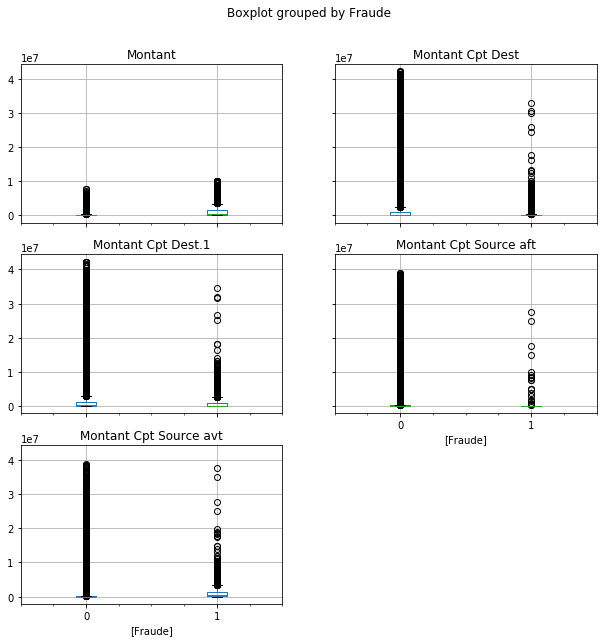

In [12]:
trainData.boxplot(by="Fraude",figsize=(10,10))

In [29]:
#Pour essayer d'améliorer les résultats on va utiliser un PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


